In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
sys.path.append('..')
from src.data.loader import GTZANDataset, create_data_loaders

In [3]:
plt.style.use('seaborn-v0_8-darkgrid')

# Load dataset

In [4]:
data_dir = "../data/gtzan/images_original"
file_extension = '.png'

In [5]:
dataset = GTZANDataset(data_dir, mode='train', file_extension=file_extension)

Loading file paths from ../data/gtzan/images_original...
Found 999 files across 10 genres
Split train has 799 samples


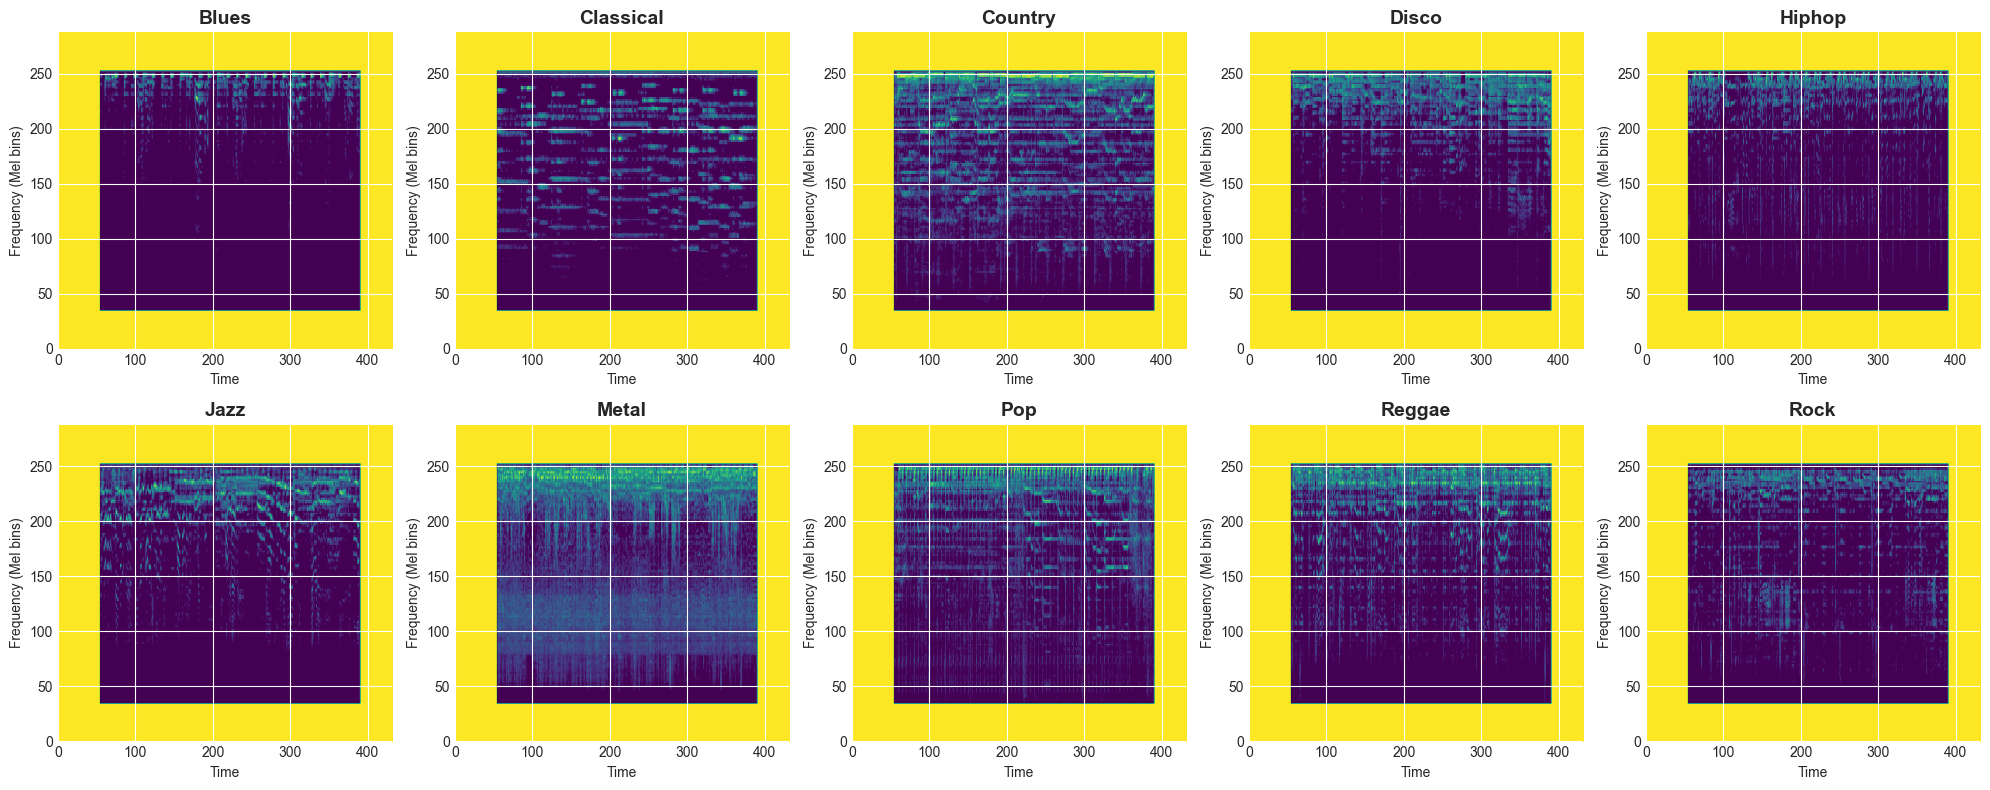

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, genre in enumerate(dataset.genres):
    # Find first sample from this genre
    for i, (path, label) in enumerate(zip(dataset.file_paths, dataset.labels)):
        if dataset.label_to_genre[label] == genre:
            # Load and display
            spec, _ = dataset[i]
            spec_np = spec.squeeze().numpy()  # Remove channel dim
            
            axes[idx].imshow(spec_np, aspect='auto', origin='lower', cmap='viridis')
            axes[idx].set_title(f'{genre.capitalize()}', fontsize=14, fontweight='bold')
            axes[idx].set_xlabel('Time')
            axes[idx].set_ylabel('Frequency (Mel bins)')
            break

plt.tight_layout()
plt.savefig('../results/spectrograms_grid.png', dpi=150, bbox_inches='tight')
plt.show()

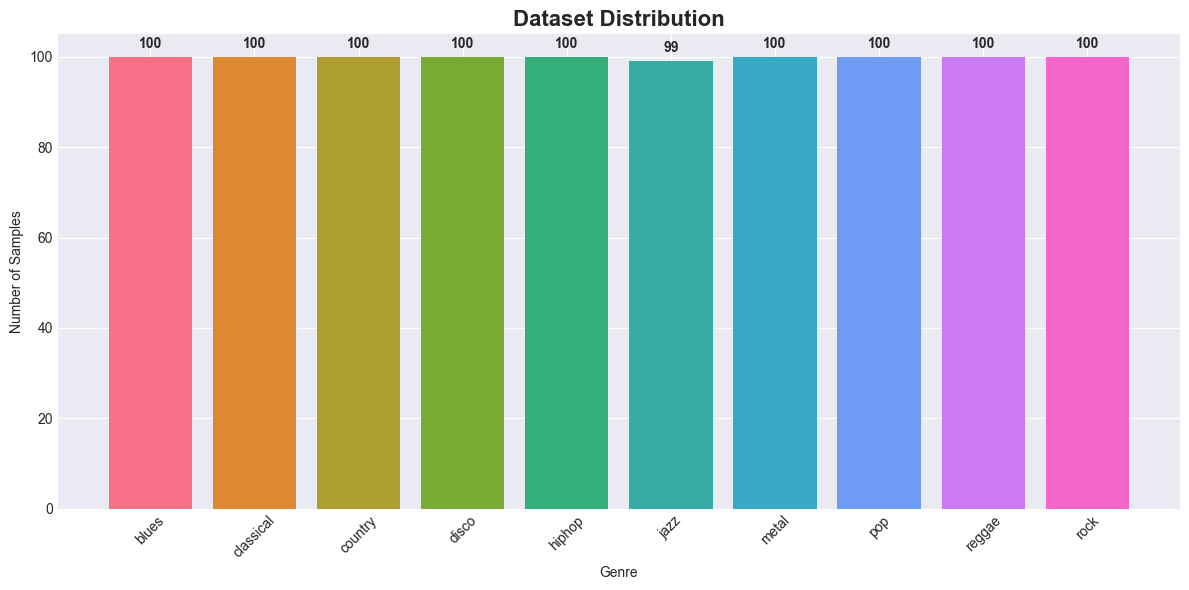

In [7]:
genre_counts = {}
for genre in dataset.genres:
    genre_dir = os.path.join(data_dir, genre)
    if os.path.exists(genre_dir):
        files = [f for f in os.listdir(genre_dir) if f.endswith(file_extension)]
        genre_counts[genre] = len(files)

plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color=sns.color_palette("husl", 10))
plt.title('Dataset Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
for i, (genre, count) in enumerate(genre_counts.items()):
    plt.text(i, count + 2, str(count), ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('../results/dataset_distribution.png', dpi=150)
plt.show()